In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [22]:
# load and merge datasets

calories=pd.read_csv('calories.csv')
exercise=pd.read_csv('exercise.csv')

# merge the datasets on UserID

df=pd.merge(exercise,calories, on="User_ID")

In [23]:
print(df.head())
print(df.info())
print(df.describe())


    User_ID  Gender  Age  Height  ...  Duration  Heart_Rate  Body_Temp  Calories
0  14733363    male   68   190.0  ...      29.0       105.0       40.8     231.0
1  14861698  female   20   166.0  ...      14.0        94.0       40.3      66.0
2  11179863    male   69   179.0  ...       5.0        88.0       38.7      26.0
3  16180408  female   34   179.0  ...      13.0       100.0       40.5      71.0
4  17771927  female   27   154.0  ...      10.0        81.0       39.8      35.0

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp 

In [24]:
# preprocessing

df['Gender']= df['Gender'].map({'male':0,'female':1})
df.isnull().sum()


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [25]:
df.columns


Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

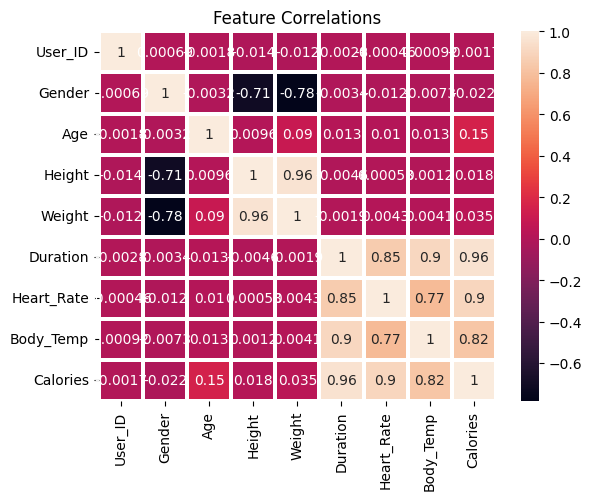

In [28]:
# data visualization

sns.heatmap(df.corr(),annot=True,linewidths=1.5)
plt.title("Feature Correlations")
plt.show()


In [37]:
# Feature Selection

X=df.drop(['Calories','User_ID'],axis=1)
y=df['Calories']

In [38]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
# Train the model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Evaluate the model

y_pred=model.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 score: {r2:.2f}")


Mean Absolute Error: 1.72
R2 score: 1.00


In [41]:
import joblib
joblib.dump(model,'calories_model.pkl')

['calories_model.pkl']